In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Exploration and Preparation

### Load Dataset and Intial Exploration:

In [80]:
# Load the 'mnist_train' Data
mnist_train_data = pd.read_csv("mnist_train.csv")

mnist_train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# Identify the number of unique labels
unique_classes = mnist_train_data["label"].unique()
num_unique_classes = mnist_train_data["label"].nunique()
print("Number of unique classes: ", num_unique_classes)
print("Unique classes: ", unique_classes)

Number of unique classes:  10
Unique classes:  [5 0 4 1 9 2 3 6 7 8]


In [82]:
# Identify the number of features
num_features = mnist_train_data.shape[1] - 1  # exclude the label column
print("Number of features: ", num_features)

Number of features:  784


In [83]:
# Check for missing values
num_missing_values = mnist_train_data.isnull().sum()
num_missing_values_all = mnist_train_data.isnull().sum().sum()
print("Number of missing values: ", num_missing_values_all)
print("----------------------------------------")
print("Number of missing values for every column:\n", num_missing_values)

Number of missing values:  0
----------------------------------------
Number of missing values for every column:
 label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


### Normalize and Resize Images:

In [84]:
# Extract the features and labels
x = mnist_train_data.iloc[:, 1:]
y = mnist_train_data["label"]

In [85]:
# Normalizing each image 
x = x/255.0
x.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# Reshape the images to 28x28
x = x.values.reshape(-1,28,28,1)
x.shape

(60000, 28, 28, 1)

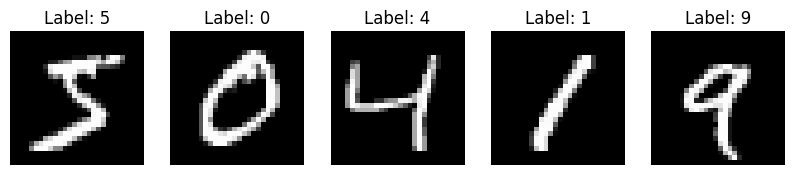

In [87]:
# Visualize the first 5 images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

In [88]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)